In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# **************** Load Data *********
data = pd.read_csv('/kaggle/input/healthcare-analysis-dataset/healthcare_cost_analysis_dataset.csv')
print(data.head(10))

: 

In [ ]:
#  Change the datatype of columns Number_of_Visits
data['Number_of_Visits'] = data['Number_of_Visits'].astype(float)

# check for duplica

# Clean the data
data = data.dropna()
print(data.isnull().sum())

#  Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:

# ************* Explore the data ************

# 1. Basic information of Dataset
print("------------- Basic information -----------")
print(data.info())
print("----------- summary of the data --------------")
# 2. Get a summary of the data
print(data.describe())
print("----------- chack missing values -------------")

#  3. chack for missing values
print(data.isnull().sum())
print("------------ Unique values by column------------")

#  4. Unique values in lable & category columns
print("Unique labels : ", data["Label"].unique())
print("Unique Categorys : ", data["Category"].unique())
print("-------------------------")

#  5. Average value of Medical Costs
average_cost = data['Medical_Costs'].mean()
print(f"Average Medical Costs: {average_cost}")
print("-------------------------")

# 6. Total Number of Visits
total_visit = data["Number_of_Visits"].sum()
print(f"Total Number of Visits : {total_visit}")

In [ ]:
# ************* Group by category and lable ***************

#  7. Total Number_of_Visits by category
total_Number_of_Visits = data.groupby('Category')['Number_of_Visits'].sum()
print(total_Number_of_Visits)

print("-------------------------")

# 8. Manimum Medical Costs by lable
manimum_medical_cost = data.groupby('Label')['Medical_Costs'].min()
print(manimum_medical_cost)
print("-------------------------")

# 9. Avg Medical Costs by category
avg_Medical_Costs = data.groupby('Category')['Medical_Costs'].mean()
print(avg_Medical_Costs)

In [ ]:
#  10. Monthly Number_of_Visits
data['Month'] = data['Date'].dt.month
monthly_visit = data.groupby('Month')['Number_of_Visits'].sum()
print(monthly_visit)

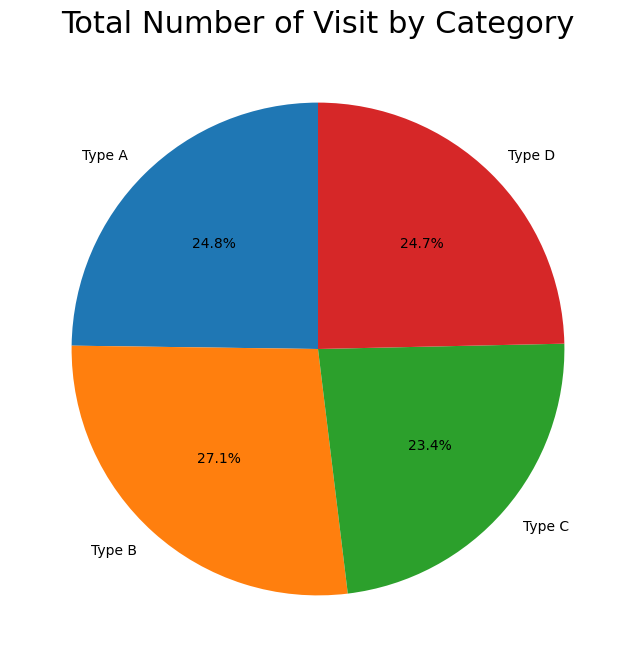

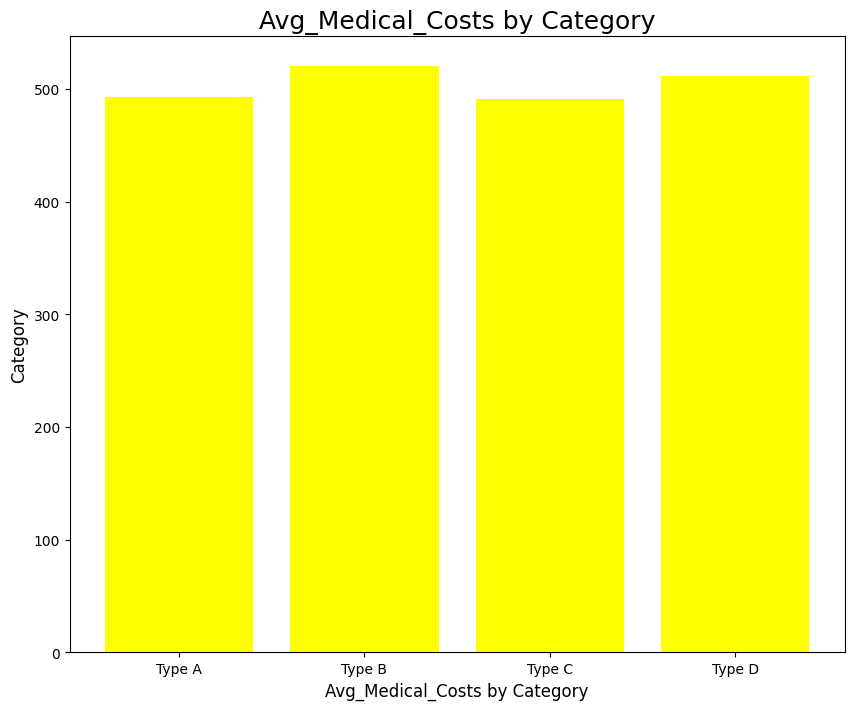

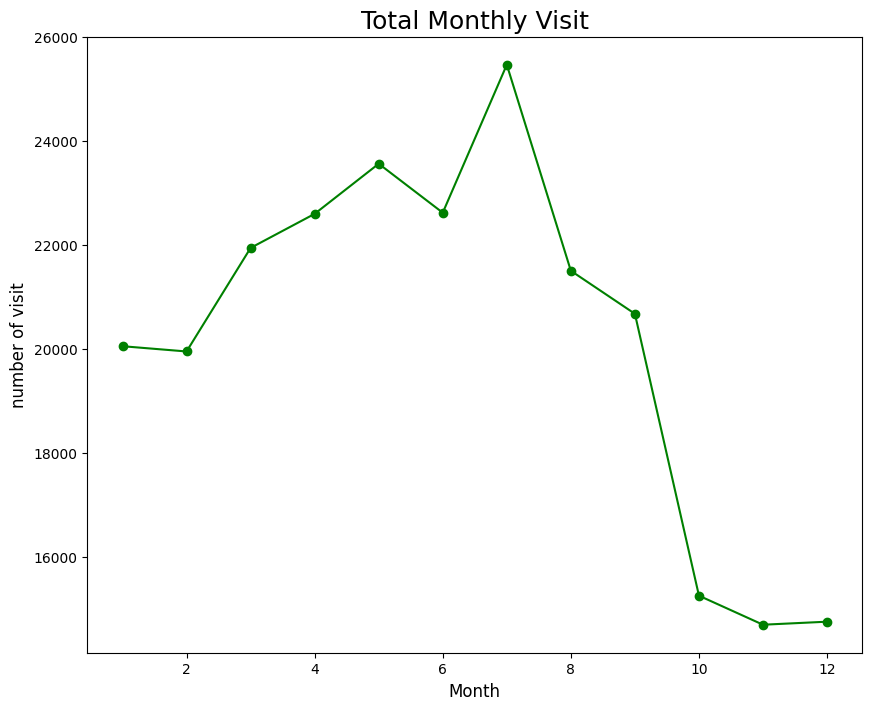

In [78]:
# Visualization

# 1. Pie chart ---->
plt.figure(figsize=(10, 8))
plt.pie(total_Number_of_Visits.values, labels=total_Number_of_Visits.index, autopct='%1.1f%%', startangle=90)
plt.title("Total Number of Visit by Category", fontsize=22)
plt.show()

# 2. bar chart ----> 
plt.figure(figsize=(10, 8))
plt.bar(avg_Medical_Costs.index, avg_Medical_Costs.values, color='yellow')
plt.title("Avg_Medical_Costs by Category", fontsize=18)
plt.xlabel("Avg_Medical_Costs by Category", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

# 3. plot chart ------>
plt.figure(figsize=(10, 8))
plt.plot(monthly_visit.index, monthly_visit.values, marker='o', color='green')
plt.title("Total Monthly Visit", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("number of visit", fontsize=12)
plt.show()